<h1>House Price Prediction</h1>

About: The dataset consisted of historic data on houses sold between Jun 2014 to Dec 2015.

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle.
The dataset consisted of 21 variables and 21613 observations.


The cell below imports the necessary libraries: pandas for data manipulation, seaborn for data visualization, and matplotlib for plotting. The %matplotlib inline magic command ensures that the plots are displayed inline in the Jupyter Notebook.



In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Load the dataset and display the first few rows:
kc_data = pd.read_csv("C:/Users/Ola/Desktop/320 project/kc_house_data.csv")
kc_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Review columns from the DataFrame

id : A property identification number is a number assigned to parcels of real property by the tax assessor of a particular jurisdiction for purposes of identification and record keeping.

date : Date of transaction

price : Price of house

bedrooms, bathrooms : Number

sqft_living, sqft_lot : The Original square footage of the living and lot space when the house was built

floors : Total floors in the house

waterfront: Whether the house is on a waterfront(1: yes, 0: no)

view : special view?

condition : Condition of the house

grade : the grade or grading around your house is the level of the ground. The ground level and how it's graded is the deciding factor of where storm water will flow

sqft_above,sqft_basement : Square footage of house apart from basement and basement area

yr_built : Built year

yr_renovated : Year when the house was renovated

zipcode, lat, long : zip code, latitude and logtitude coordinate of the house

sqft_living15, sqft_lot15 : The latest square footage of the living and lot space




In [3]:
kc_data.shape

(21613, 21)

In [4]:
kc_data.drop_duplicates()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Display information about the dataset, including the column names, data types, and the number of non-null values in each column.

In [5]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
kc_data.yr_renovated.value_counts()

yr_renovated
0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: count, Length: 70, dtype: int64

Descriptive statistics of the numerical columns in the dataset, including count, mean, standard deviation, minimum, quartiles, and maximum values.

In [7]:
kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
#  Check for missing values in the dataset
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

<h2>Exploratory Data Analysis</h2>
<strong>Scatter Plot</strong><br>

A scatter plot to visualize the relationship between the number of bedrooms and bathrooms in the house

Text(0, 0.5, 'bathrooms')

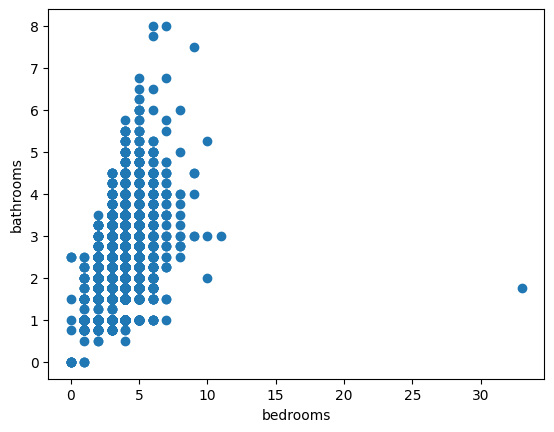

In [9]:
plt.scatter(kc_data.bedrooms, kc_data.bathrooms)
plt.xlabel("bedrooms")
plt.ylabel('bathrooms')

Relationship between the condition of the houses and the view they have

Text(0, 0.5, 'view')

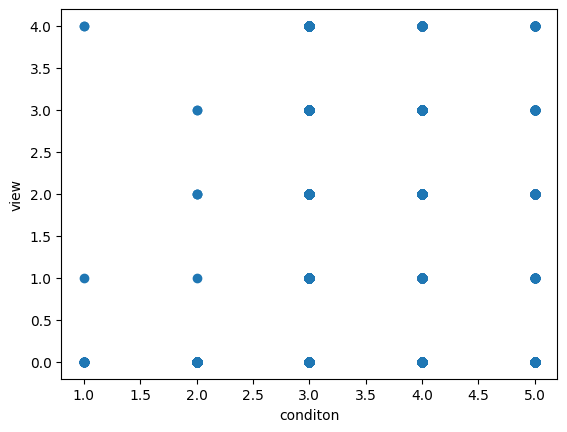

In [10]:
plt.scatter(kc_data.condition, kc_data.view)
plt.xlabel("conditon")
plt.ylabel('view')

<h2>Feature Engineering</h2>

In [11]:
# import random 

# ga = ("Attached", 'Detached')

# kc_data['garage'] = random.choices(ga, k=len(kc_data))
# kc_data.garage.astype(str)
# kc_data.garage.value_counts()

# from sklearn.preprocessing import OneHotEncoder

# le = OneHotEncoder(sparse=False)
# kc_data['garage'] = le.fit_transform(kc_data[['garage']])
# kc_data.garage.astype(int)
# kc_data

garage : 0.0 for Attached garage and 1.0 for Detached garage

In [12]:
from datetime import datetime as t
kc_data['date'] = pd.to_datetime(kc_data['date'] )
kc_data["tr_year"] = kc_data["date"].dt.year
kc_data["tr_month"] = kc_data["date"].dt.month
# kc_data['tr_day'] = kc_data['date'].dt.day
kc_data["date"] = kc_data["date"].dt.strftime("%d/%m/%Y")

kc_data



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tr_year,tr_month
0,7129300520,13/10/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,09/12/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,25/02/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,09/12/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,18/02/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,21/05/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,23/02/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,23/06/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,16/01/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [13]:
# Filter out houses with an unrealistic number of bedrooms from the scatter plot
dataset=kc_data[kc_data['bedrooms']<33]

In [14]:
# Calculate the age of the house in years
import numpy as np
dataset['yr_old'] = 2023 - dataset.yr_built 
# Create a binary column indicating whether the house has been renovated or not
dataset['renovated_status'] = np.where(dataset['yr_renovated'] > 0, 1, 0)

C:\Users\Ola\AppData\Local\Temp\ipykernel_3432\2964903153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['yr_old'] = 2023 - dataset.yr_built
C:\Users\Ola\AppData\Local\Temp\ipykernel_3432\2964903153.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['renovated_status'] = np.where(dataset['yr_renovated'] > 0, 1, 0)


the cell above creates two new columns in the dataset: 'yr_old', which represents the age of the house in years, and 'renovated_status', which indicates whether a house has been renovated or not based on the 'yr_renovated' column.


In [15]:
dataset.price = dataset.price.astype(int)
dataset.head()

C:\Users\Ola\AppData\Local\Temp\ipykernel_3432\270607020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.price = dataset.price.astype(int)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tr_year,tr_month,yr_old,renovated_status
0,7129300520,13/10/2014,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,2014,10,68,0
1,6414100192,09/12/2014,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,72,1
2,5631500400,25/02/2015,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,2015,2,90,0
3,2487200875,09/12/2014,604000,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,2014,12,58,0
4,1954400510,18/02/2015,510000,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,2015,2,36,0


In [16]:
# Drop unnecessary columns that wont be needed any longer
dataset.drop(['yr_built','yr_renovated'], axis=1, inplace=True)

C:\Users\Ola\AppData\Local\Temp\ipykernel_3432\1181802710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(['yr_built','yr_renovated'], axis=1, inplace=True)


In [17]:
# Splitting into x and y dataset
y=dataset['price']
x= dataset.drop(columns=["price","id",'date'])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=40)

In [19]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,tr_year,tr_month,yr_old,renovated_status
7188,5,2.25,1750,5000,1.0,0,0,3,8,960,790,98105,47.6589,-122.276,2580,5000,2015,3,83,0
10798,4,2.50,2400,7292,1.0,0,0,3,8,1530,870,98133,47.7749,-122.339,1710,7909,2015,3,43,0
10233,3,2.50,1940,10800,1.0,0,0,3,8,1340,600,98077,47.7471,-122.075,2080,9600,2014,10,44,0
3013,3,1.00,970,9130,1.0,0,0,3,6,970,0,98188,47.4369,-122.272,1000,8886,2015,3,66,0
7814,4,1.00,1590,24330,1.5,0,0,3,6,1140,450,98168,47.4906,-122.309,1000,16228,2014,12,81,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11532,5,2.75,2930,31411,1.0,0,0,4,9,1520,1410,98006,47.5576,-122.186,3070,12378,2014,7,48,0
16066,2,1.00,750,6350,1.0,0,0,3,5,750,0,98103,47.6938,-122.356,920,6350,2014,8,103,0
14501,3,1.00,1150,6480,1.5,0,0,4,5,1150,0,98001,47.2642,-122.258,1100,7300,2015,5,77,0
14555,3,1.75,2460,4240,1.0,0,0,4,7,1230,1230,98103,47.6593,-122.337,1700,4240,2015,2,98,0


<h2>Linear Regression</h2>

In [20]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression() # creates a Linear Regression model,
lin.fit(x_train, y_train) #fits it to the training data
lin.score(x_test,y_test) #calculates the R^2 score

0.6979182741936375

<h2>Polynomial Regression</h2>

In [21]:
#converting x to polynomial to check the status of polynomial regression
from sklearn.preprocessing import PolynomialFeatures
polyreg=PolynomialFeatures(degree=2)
x_poly=polyreg.fit_transform(x_train)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y_train)

LinearRegression()

In [22]:
# Transform the testing data to polynomial features and calculate the R^2 score of the Polynomial Regression model
x_test_poly = polyreg.fit_transform(x_test)
lin_reg2.score(x_test_poly, y_test)
ypred1 = lin.predict(x_test) #output from Linear Regression
ypred2=  lin_reg2.predict(polyreg.fit_transform(x_test)) #Output from Polynomial Regression
from sklearn.metrics import r2_score
lin_score= r2_score(y_test,ypred1)#Score from Linear Regression
poly_score=r2_score(y_test,ypred2)#Score from Polynomial Regression
print('Score for MultiLinear Regression',str(lin_score),'\n','Score for Polynomial Regression',str(poly_score))

Score for MultiLinear Regression 0.6979182741936375 
 Score for Polynomial Regression 0.8131874946071891


Visualize the predicted prices from both models compared to the actual prices using scatter plots.

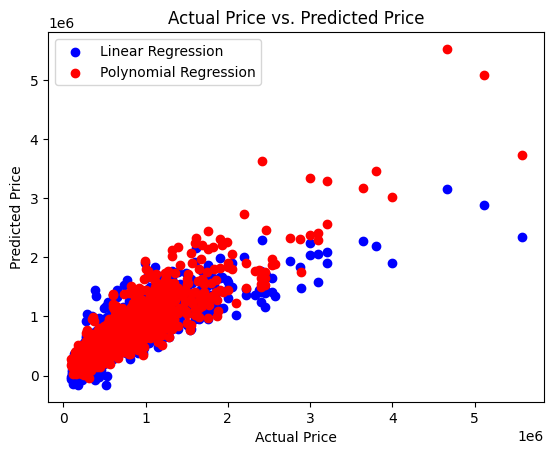

In [23]:
plt.scatter(y_test, ypred1, color='blue', label='Linear Regression')
plt.scatter(y_test, ypred2, color='red', label='Polynomial Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()

<h2>Decision Tree Regressor, SVR</h2>

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

derc = DecisionTreeRegressor()
derc.fit(x_train,y_train)

y_p = derc.predict(x_test)
dec_score = r2_score(y_test,y_p)

svr = SVR()
svr.fit(x_train,y_train)
s_p = svr.predict(x_test)
svr_score = r2_score(y_test,s_p)

print("derc score:", dec_score)
print("svr score:",svr_score)


derc score: 0.7277731448232279
svr score: -0.06099086520378494


<h2>Random Forest Regressor</h2>

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regression model and fit it to the training data
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Calculate the R^2 score of the Random Forest Regression model on the testing data
rf_pre = rf.predict(x_test)
rf_score = r2_score(y_test,rf_pre)
print("RandomForestRegressor score:", rf_score)

RandomForestRegressor score: 0.883842479480819


<h2>XGBoost</h2>

In [26]:
#boosting accuracy
from xgboost import XGBRegressor
# Create an XGBoost Regressor model and fit it to the training data
regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200)
regboost.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [27]:

# Predict on the testing data
yboost=regboost.predict(x_test)

# Calculate the R^2 score for XGBoost Regressor
from sklearn.metrics import r2_score
regboost_score= r2_score(y_test,yboost)
print("Score with XGBoost regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200)",regboost_score)

Score with XGBoost regboost=XGBRegressor(learning_rate=0.3, max_depth=4, n_estimators=200) 0.898942336259283


In [28]:
# Create an XGBoost Regressor model with different features and fit it to the training data
xg2 = XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=900)
xg2.fit(x_train, y_train)
y_pred5 = xg2.predict(x_test)

# Calculate the R^2 score for  the second XGBoost Regressor
xg2_score = r2_score(y_test,y_pred5)
print(" xg2 Score: ",xg2_score)

 xg2 Score:  0.9114686668453958


In [29]:
xg2.score(x_train,y_train)

0.9923568352583436

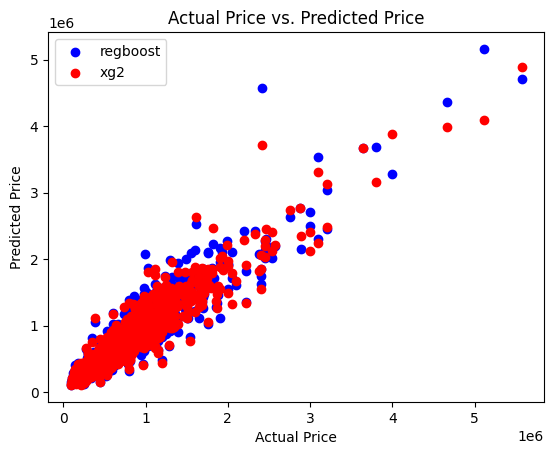

In [30]:
plt.scatter(y_test, yboost, color='blue', label='regboost')
plt.scatter(y_test, y_pred5, color='red', label='xg2')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs. Predicted Price')
plt.legend()
plt.show()

<h2>LightGBM</h2>

In [31]:
import lightgbm as lgb

# Define and train the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learning_rate': 0.1,
    'n_estimators': 900
}

lgb_model = lgb.LGBMRegressor(**params)
lgb_model.fit(x_train, y_train)

# Evaluate the model
score = lgb_model.predict(x_test)
lgb_score = r2_score(y_test,score)
print('Score for LightGBM:', lgb_score)

Score for LightGBM: 0.9130961395509418


<h2>Ensemble Model Stacking</h2>

In [32]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Define the base models
base_models = [
    ("XGBRegressor",XGBRegressor(colsample_bytree=0.5, learning_rate=0.1, max_depth=6, n_estimators=900)),
    ('lightgbm', lgb.LGBMRegressor(**params)),
    ('random_forest', RandomForestRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

# Define the meta-model
meta_model = LinearRegression()

# Create the ensemble model
ensemble_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Evaluate the model
ems_pre = ensemble_model.predict(x_test)
ems_score= r2_score(y_test,ems_pre)
print('Score for Ensemble Model Stacking:', ems_score)

Score for Ensemble Model Stacking: 0.9166359762605926


In [33]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

elastic.fit(x_train,y_train)
elasticnet_score = elastic.score(x_test,y_test)


c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.783e+14, tolerance: 2.359e+11
  model = cd_fast.enet_coordinate_descent(




<h2>Leveraging Long Short-Term Memory (LSTM) Neural Network</h2>

In [34]:
# # from keras.models import Sequential
# # from keras.layers import LSTM, Dense

# # # Define your LSTM model architecture
# # model = Sequential()
# # model.add(LSTM(units=128, input_shape=(x_train.shape[1], x_train.shape[2])))
# # model.add(Dense(units=1))

# # # Compile and train the model
# # model.compile(loss='mean_squared_error', optimizer='adam')
# # model.fit(x_train, y_train, epochs=50, batch_size=32)

# # # Evaluate the model
# # score = model.evaluate(x_test, y_test)
# # print('Score for LSTM model:', score)

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

x_train_lstm = x_train.values.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test_lstm = x_test.values.reshape((x_test.shape[0], 1, x_test.shape[1]))

lstm_model = Sequential()
lstm_model.add(LSTM(100, input_shape=(1, x_train_lstm.shape[2])))
lstm_model.add(Dense(50))
lstm_model.add(Dense(10))
lstm_model.add(Dense(1))


lstm_model.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

lstm_model.fit(x_train_lstm, y_train, epochs=10)

# Make predictions with the trained LSTM model
predictions_lstm = lstm_model.predict(x_test_lstm)

# Evaluate the LSTM model
loss_lstm, accuracy_lstm = lstm_model.evaluate(x_test_lstm, y_test)
print(f"LSTM Model - Loss: {loss_lstm}, Accuracy: {accuracy_lstm}")

Epoch 1/10
541/541 [==============================] - 14s 9ms/step - loss: 534896.1875 - accuracy: 0.0000e+00
Epoch 2/10
541/541 [==============================] - 3s 6ms/step - loss: 440508.2188 - accuracy: 0.0000e+00
Epoch 3/10
541/541 [==============================] - 4s 8ms/step - loss: 256629.8281 - accuracy: 0.0000e+00
Epoch 4/10
541/541 [==============================] - 3s 5ms/step - loss: 225250.2969 - accuracy: 0.0000e+00
Epoch 5/10
541/541 [==============================] - 3s 5ms/step - loss: 224367.5000 - accuracy: 0.0000e+00
Epoch 6/10
541/541 [==============================] - 3s 5ms/step - loss: 223839.5469 - accuracy: 0.0000e+00
Epoch 7/10
541/541 [==============================] - 3s 5ms/step - loss: 223492.7344 - accuracy: 0.0000e+00
Epoch 8/10
541/541 [==============================] - 4s 8ms/step - loss: 223618.4062 - accuracy: 0.0000e+00
Epoch 9/10
541/541 [==============================] - 3s 6ms/step - loss: 223432.3750 - accuracy: 0.0000e+00
Epoch 10/10
136/13

In [35]:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso.fit(x_train, y_train)

# Access the coefficients of the selected features
selected_features = lasso.coef_

lasso_score = lasso.score(x_test, y_test)
lasso_score

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.208e+14, tolerance: 2.359e+11
  model = cd_fast.enet_coordinate_descent(


0.6979185957175016

In [36]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# Apply a transformer to the input features (x_train)
transformer = PowerTransformer()
x_train_transformed = transformer.fit_transform(x_train)

# Create the TransformedRegressor using LinearRegression as the base regressor
transformed_reg = TransformedTargetRegressor(regressor=LinearRegression())

# Fit the TransformedRegressor to the transformed training data
transformed_reg.fit(x_train_transformed, y_train)

# Transform the testing data using the same transformer
x_test_transformed = transformer.transform(x_test)

# Predict on the transformed testing data
y_pred = transformed_reg.predict(x_test_transformed)

# Calculate the R2 score
transformed_reg_score = r2_score(y_test, y_pred)
print(f"R2 Score: {transformed_reg_score}")

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3260: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)


R2 Score: 0.6074120278707434


In [48]:
models = [lin,polyreg,derc,svr,rf,regboost,xg2,lgb_model,ensemble_model,elastic,lstm_model,lasso,transformed_reg]
test_scores = [lin_score,poly_score,dec_score,svr_score,rf_score,regboost_score,xg2_score,lgb_score,ems_score,elasticnet_score,accuracy_lstm,lasso_score,transformed_reg_score]
model_names = ['Multiple Linear reg',"Polynomial (degree=2)",'DecisionTreeRegressor','SVR', 'RandomForestRegressor', 'XGBRegressor (xgboost)',
               'XGBRegressor (xg2)', 'LightGBM', 'Model Stacking','ElasticNet','LSTM','Lasso', 'TransformedTargetRegressor']

combined_data = {"Model Names": model_names, 'Regression Models' : models, "Test R2 Scores": test_scores}
models_df = pd.DataFrame(combined_data)
models_df.sort_values(by=['Test R2 Scores'])


,Model Names,Regression Models,Test R2 Scores
3,SVR,SVR(),-0.060991
10,LSTM,<keras.engine.sequential.Sequential object at ...,0.000000
12,TransformedTargetRegressor,TransformedTargetRegressor(regressor=LinearReg...,0.607412
9,ElasticNet,ElasticNet(),0.625474
0,Multiple Linear reg,LinearRegression(),0.697918
11,Lasso,Lasso(alpha=0.1),0.697919
2,DecisionTreeRegressor,DecisionTreeRegressor(),0.727773
1,Polynomial (degree=2),PolynomialFeatures(),0.813187
4,RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",0.883842
5,XGBRegressor (xgboost),"XGBRegressor(base_score=None, booster=None, ca...",0.898942


Ensemble Stacking Model performed best

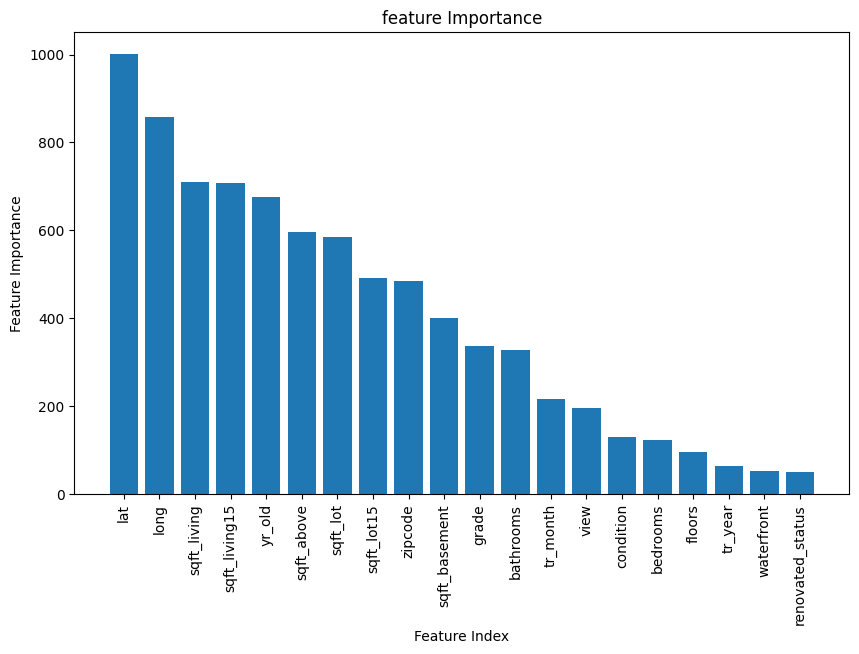

In [38]:
importances = lgb_model.feature_importances_

feature_importances = pd.DataFrame({"feature":x.columns, "Importances":importances})

feature_importances = feature_importances.sort_values("Importances", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importances['feature'], feature_importances['Importances'])
plt.xticks(rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("feature Importance")
plt.savefig('lgb_model feature importance')
plt.show()

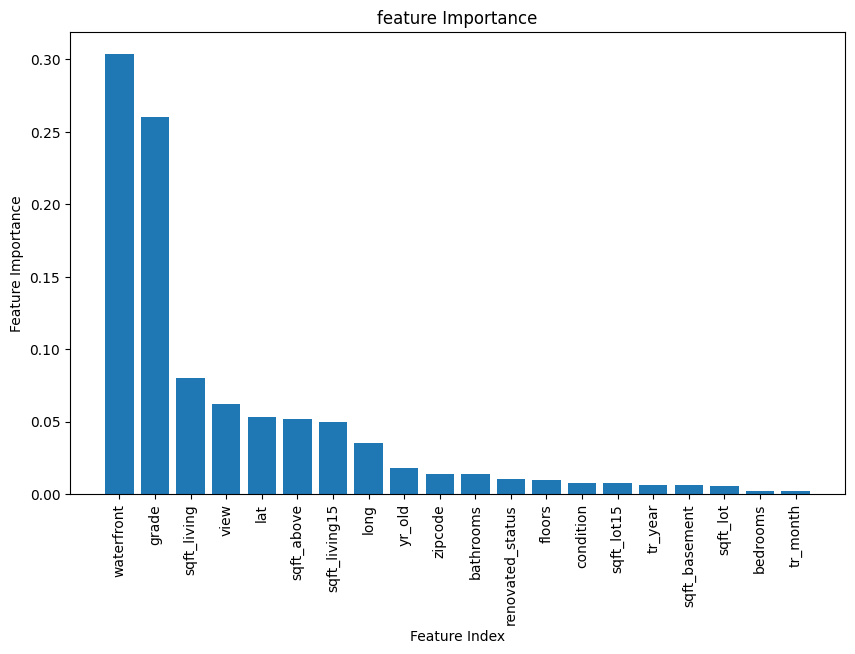

In [39]:
importances = xg2.feature_importances_

feature_importances = pd.DataFrame({"feature":x.columns, "Importances":importances})

feature_importances = feature_importances.sort_values("Importances", ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importances['feature'], feature_importances['Importances'])
plt.xticks(rotation=90)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance")
plt.title("feature Importance")
plt.savefig('XGB feature importance')
plt.show()

In [41]:
def predict_price(bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,tr_year,tr_month,yr_old,renovated_status):

    inputs = [bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,tr_year,tr_month,yr_old,renovated_status]
    1,-1
    # convert the inputs to numpy array
    inputs_to_numpy = np.asarray(inputs)

    reshape_inputs = inputs_to_numpy.reshape(1,-1)

    make_prediction = ensemble_model.predict(reshape_inputs)

    return ("${}".format(make_prediction[0]))

In [42]:
predict_price(3,1.0,1180,5650,1.0,0,0,3,7,1180,1500,98178,47.5112,-122.11,1180,1290,2015,4,68,0)

c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


'$301888.6944233886'

Save the model to a joblib file 

In [43]:
import joblib

joblib.dump(ensemble_model,"Kentucky_model.joblib")

['Kentucky_model.joblib']

In [44]:
import sklearn
sklearn.__version__


'1.2.2'

In [45]:

import xgboost
xgboost.__version__


'1.7.6'

In [46]:
pd.__version__

'2.0.2'

In [47]:
np.__version__

'1.24.3'